# Initilization

## Cluster Connection

In [2]:
# Import ipython widgets
import json
import math
import os

import ipywidgets as widgets
import matplotlib.pyplot
import numpy as np
import rich
import pandas as pd

# Set up the environment.
import scipy.signal
from IPython.display import display
from ipywidgets import fixed, interact, interact_manual, interactive

from qblox_instruments import Cluster, PlugAndPlay, Pulsar
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# close all previous connections to the cluster
Cluster.close_all()

#device_name = "pingu_cluster"
device_name = "loki_cluster"
ip_address = '192.0.2.141'
# connect to the cluster and reset
cluster = Cluster(device_name, ip_address)
cluster.reset()
print(f"{device_name} connected at {ip_address}")

loki_cluster connected at 192.0.2.141


In [15]:
# Cluster.close_all()

cluster.reset()

In [11]:
cluster.reboot()

## SPI

In [42]:
from workers.hardware_utils import SpiDAC
spi = SpiDAC()

Connected to: Qblox SPI Rack (serial:None, firmware:{'device': 'v1.6 - May 10 2019 - mt', 'driver': {'version': '0.11.1', 'build': '18/09/2023-09:00:54', 'hash': '977377ad', 'dirty': False}}) in 0.00s


In [43]:
# spi.set_dacs_zero()

In [44]:
dac0 = spi.create_spi_dac('q21_q22')
dac1 = spi.create_spi_dac('q16_q21')
# dac = spi.create_spi_dac('q13_q14')

 spi_mod_number = 3
 dac_name = 'dac1'
 spi_mod_number = 2
 dac_name = 'dac2'


In [45]:
dac0.current(),dac1.current()

(0.0010398864746093764, 0.0)

In [13]:
parking_current = 0e-6
spi.set_dac_current(dac0, parking_current)

ramping 0.0005498886108398424
ramping 0.0005317687988281236
ramping 0.0005117416381835924
ramping 0.0004926681518554674
ramping 0.00047359466552734236
ramping 0.0004535675048828111
ramping 0.00043468475341796806
ramping 0.0004146575927734368
ramping 0.0003955841064453118
ramping 0.00037555694580078056
ramping 0.00035648345947265556
ramping 0.0003364562988281243
ramping 0.0003173828124999993
ramping 0.00029735565185546806
ramping 0.00027828216552734306
ramping 0.0002582550048828118
ramping 0.00023937225341796875
ramping 0.0002193450927734375
ramping 0.0002002716064453125
ramping 0.00018024444580078125
ramping 0.00016117095947265625
ramping 0.000141143798828125
ramping 0.0001220703125
ramping 0.00010204315185546875
ramping 8.296966552734375e-05
ramping 6.29425048828125e-05
ramping 4.4059753417969444e-05
ramping 2.4032592773438194e-05
ramping 4.959106445313194e-06
Finished ramping
 parking_current = 0.0
 dac.current() = 0.0


In [50]:
parking_current = 1039e-6
spi.set_dac_current(dac0, parking_current)

ramping 0.0010419845581054674
Finished ramping
 parking_current = 0.001039
 dac.current() = 0.0010389328002929701


In [33]:
spi.set_dac_current(dac0, 0)
spi.set_dac_current(dac1, 0)

ramping 0.0005998611450195312
ramping 0.0005998611450195312
ramping 0.0005790710449218757
ramping 0.0005584716796874986
ramping 0.0005376815795898431
ramping 0.0005170822143554694
ramping 0.0004962921142578139
ramping 0.0004756927490234368
ramping 0.00045490264892578125
ramping 0.00043430328369140764
ramping 0.0004135131835937486
ramping 0.000392913818359375
ramping 0.0003723144531250014
ramping 0.00035152435302734236
ramping 0.00033092498779296875
ramping 0.0003101348876953132
ramping 0.0002895355224609361
ramping 0.00026874542236328056
ramping 0.00024814605712890694
ramping 0.0002273559570312514
ramping 0.0002067565917968743
ramping 0.0001861572265625007
ramping 0.00016536712646484514
ramping 0.00014476776123046806
ramping 0.0001239776611328125
ramping 0.00010337829589843889
ramping 8.258819580077986e-05
ramping 6.198883056640625e-05
ramping 4.1198730468750694e-05
ramping 2.0599365234373612e-05
Finished ramping
 parking_current = 0
 dac.current() = 0.0
Finished ramping
 parking_curre

/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/qblox_instruments/native/spi_rack_modules/s4g_module.py:407: RuntimeWarning: invalid value encountered in scalar divide
  dt = np.abs(val_begin - val) / self._ramp_rate / num_steps


In [20]:
import redis
redis_connection = redis.Redis(decode_responses=True)
# couplers = [ 'q13_q14']
couplers = [ 'q21_q22']
for coupler in couplers: 
    print(f"Coupler parameters {coupler}:")
    redis_config = redis_connection.hgetall(f"transmons:{coupler}")
    # Print the redis config line by line
    for key, value in redis_config.items():
        print(f"{key}: {value}")

Coupler parameters q21_q22:
parking_current: 0


In [8]:
# coupler = 'q13_q14'
coupler = 'q21_q22'
transmon_parameter = 'parking_current'
# parking_current = 775e-6
# parking_current = 750e-6
# parking_current = 700e-6
for coupler in couplers: 
    redis_connection.hset(f"transmons:{coupler}", f"{transmon_parameter}",parking_current)
parking_current = float(redis_connection.hget(f'transmons:{coupler}', 'parking_current'))
print(parking_current)

# TAC Calibration

In [13]:
!python reset_redis.py all

 remove_node = 'all'


In [60]:
# !python reset_redis.py 'resonator_spectroscopy'
# !python reset_redis.py 'qubit_01_spectroscopy_multidim'
# !python reset_redis.py 'rabi_oscillations'
# !python reset_redis.py 'ramsey_correction'
# !python reset_redis.py 'motzoi_parameter'
# !python reset_redis.py 'T1'
# !python reset_redis.py 'T2'
# !python reset_redis.py 'T2_echo'
# !python reset_redis.py 'n_rabi_oscillations'
# !python reset_redis.py 'resonator_spectroscopy_1'
# !python reset_redis.py 'qubit_12_spectroscopy_multidim'
# !python reset_redis.py 'rabi_oscillations_12'
# !python reset_redis.py 'ramsey_correction_12'
# !python reset_redis.py 'resonator_spectroscopy_2'
# !python reset_redis.py 'coupler_spectroscopy'
# !python reset_redis.py 'cz_chevron'
# !python reset_redis.py 'cz_calibration'
!python reset_redis.py 'cz_calibration_ssro'
# !python reset_redis.py 'cz_dynamic_phase'
# !python reset_redis.py 'ro_frequency_optimization_gef'
# !python reset_redis.py 'ro_amplitude_optimization_gef'

 remove_node = 'cz_calibration_ssro'


In [61]:
!python workers/calibration_supervisor.py

clusterA_module13_att:40dB
clusterA_module17_att:6dB
2024-01-23 12:24:40,965 ◆ calibration_supervisor.py ◆ Starting System Calibration
╔════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║ Qubits: 10                                                                                                                                                                                                             ║
║↪ resonator_spectroscopy                                                                                                                                                                                                ║
║           ↪ qubit_01_spectroscopy_multidim                                                                                                                                                                    

In [6]:
# narrow sweep
import numpy as np
for parking_current in np.arange(1030,1050,2)*1e-6:
    print('--------------------------------------------')
    print(f'{parking_current = }')
    print('--------------------------------------------')
    spi.set_dac_current(dac0, parking_current)
    !python reset_redis.py cz_chevron
    !python workers/calibration_supervisor.py

--------------------------------------------
parking_current = 0.0010299999999999999
--------------------------------------------
ramping 0.0010398864746093764
Finished ramping
 parking_current = 0.0010299999999999999
 dac.current() = 0.00102996826171875
 remove_node = 'cz_chevron'
clusterA_module13_att:40dB
clusterA_module17_att:6dB
2024-01-22 22:43:09,558 ◆ calibration_supervisor.py ◆ Starting System Calibration
╔════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║ Qubits: 10                                                                                                                                                         ║
║↪ resonator_spectroscopy                                                                                                                                            ║
║           ↪ qubit_01_spectroscopy_multidim                                     

In [9]:
# wide sweep
import numpy as np
for parking_current in np.arange(850,1350,100)*1e-6:
    print('--------------------------------------------')
    print(f'{parking_current = }')
    print('--------------------------------------------')
    spi.set_dac_current(dac0, parking_current)
    !python reset_redis.py cz_chevron
    !python workers/calibration_supervisor.py

--------------------------------------------
parking_current = 0.00085
--------------------------------------------
ramping 0.0014999389648437493
ramping 0.0014818191528320306
ramping 0.0014617919921874993
ramping 0.0014427185058593743
ramping 0.001422691345214843
ramping 0.001403617858886718
ramping 0.0013835906982421868
ramping 0.0013647079467773438
ramping 0.0013446807861328125
ramping 0.0013256072998046875
ramping 0.0013055801391601562
ramping 0.0012865066528320312
ramping 0.0012664794921875
ramping 0.001247406005859375
ramping 0.0012273788452148438
ramping 0.0012084960937500007
ramping 0.0011884689331054694
ramping 0.0011693954467773444
ramping 0.0011493682861328132
ramping 0.0011302947998046882
ramping 0.001110267639160157
ramping 0.001091194152832032
ramping 0.0010711669921875007
ramping 0.0010522842407226576
ramping 0.0010322570800781264
ramping 0.0010131835937500014
ramping 0.0009931564331054701
ramping 0.0009740829467773451
ramping 0.0009540557861328139
ramping 0.000934982299

In [6]:
# wide sweep
import numpy as np
for parking_current in np.arange(300,900,50)*1e-6:
    print('--------------------------------------------')
    print(f'{parking_current = }')
    print('--------------------------------------------')
    spi.set_dac_current(dac0, parking_current)
    !python reset_redis.py all
    !python workers/calibration_supervisor.py

--------------------------------------------
parking_current = 0.0003
--------------------------------------------
ramping 0.0002998352050781264
Finished ramping
 parking_current = 0.0003
 dac.current() = 0.0002998352050781264
 remove_node = 'all'
clusterA_module13_att:40dB
clusterA_module17_att:6dB
2024-01-20 15:40:19,836 ◆ calibration_supervisor.py ◆ Starting System Calibration
╔════════════════════════════════════════════════════════════════════════════════════════════════╗
║ Qubits: 10                                                                                     ║
║↪ resonator_spectroscopy                                                                        ║
║           ↪ qubit_01_spectroscopy_multidim                                                     ║
║                          ↪ rabi_oscillations                                                   ║
║                                  ↪ resonator_spectroscopy_1                                    ║
║                      

## CMA-ES test

In [1]:
from config_TL import Monitor
monitor = Monitor()
monitor.node_status('cz_calibration_ssro')

clusterA_module13_att:40dB
clusterA_module17_att:6dB
Qubits:
    q16: cz_calibration_ssro: not_calibrated
    q17: cz_calibration_ssro: not_calibrated
    q18: cz_calibration_ssro: not_calibrated
    q19: cz_calibration_ssro: not_calibrated
    q20: cz_calibration_ssro: not_calibrated
    q21: cz_calibration_ssro: not_calibrated
    q22: cz_calibration_ssro: calibrated
    q23: cz_calibration_ssro: not_calibrated
    q24: cz_calibration_ssro: not_calibrated
    q25: cz_calibration_ssro: not_calibrated
-----------------------
Couplers:
    q21_q22: cz_calibration_ssro: calibrated


In [2]:
from utilities.reset_redis_node import ResetRedisNode
reset_redis = ResetRedisNode()
reset_redis.reset_node('cz_calibration_ssro')

 remove_node = 'cz_calibration_ssro'


In [17]:
from utilities.user_input import qubits,couplers
from config_TL import Monitor
from utilities.reset_redis_node import ResetRedisNode
import numpy as np
import optuna

class OptimizeNode:
    def __init__(self, node):
        self.monitor = Monitor()
        self.reset_redis = ResetRedisNode()
        self.node = node
        self.qubits = qubits
        self.couplers = couplers
        sampler = optuna.samplers.CmaEsSampler(with_margin=True)
        self.study = optuna.create_study(sampler=sampler)

    def objective_cz(self,trial):
        freqs = np.array([trial.suggest_float("freq", -1, 1,step=0.01)])*1e6
        times = np.array([trial.suggest_float("time", -10, 10,step=0.1)])*1e-9
        amps = np.array([trial.suggest_float("amp", -0.01, 0.01,step=0.001)])
        # self.reset_redis.reset_node(self.node)
        self.monitor.calibrate_node(self.node, opt_cz_pulse_frequency = dict(zip(couplers,freqs)), 
                                                        opt_cz_pulse_duration = dict(zip(couplers,times)),
                                                        opt_cz_pulse_amplitude = dict(zip(couplers,amps)))
        results = self.monitor.get_results()
        all_results = [results[coupler] for coupler in self.couplers]
        all_costs = [ ((np.abs(res['cz_phase'])-180)/180)**2 + res['cz_pop_loss']**2+res['cz_leakage']**2 for res in all_results]
        return sum(all_costs)

    def optimize_node(self):
        print(f"Optimizing {self.node}")
        self.study.optimize(self.objective_cz, n_trials=50)
        self.best_params = self.study.best_params
        print(f"Validating trail {self.study.best_trial.number} with params {self.best_params}")
        self.validate_cz()
        print(f"Optimization finished for {self.node}")
        return self.study
    
    def plot_optimization(self):
        return optuna.visualization.plot_optimization_history(self.study)

    def validate_cz(self,best_params = self.best_params):
        freqs = np.array([best_params['freq']])*1e6
        times = np.array([best_params['time']])*1e-9
        amps = np.array([best_params['amp']])
        self.monitor.calibrate_node('cz_calibration_ssro',opt_cz_pulse_frequency = dict(zip(couplers,freqs)), 
                                                        opt_cz_pulse_duration = dict(zip(couplers,times)),
                                                        opt_cz_pulse_amplitude = dict(zip(couplers,amps)))
        results = self.monitor.get_results()
        print(results)
        return results
        

In [4]:
optimize = OptimizeNode('cz_calibration_ssro')
optimize_results = optimize.optimize_node()

/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/optuna/samplers/_cmaes.py:316: ExperimentalWarning: `with_margin` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-01-23 12:38:38,402] A new study created in memory with name: no-name-602a116c-54da-4dc1-99b4-10bb90396c86
2024-01-23 12:38:38,404 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': 110000.0000000001}, 'opt_cz_pulse_duration': {'q21_q22': -2e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': -0.009000000000000001}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216230088.58646688}
cz_pulse_duration = {'q21_q22': 3.8182015076688497e-07}
cz_pulse_amplitude = {'q21_q22': 0.141}


2024-01-23 12:38:38,567 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:38:38,619 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370745599999998


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:39:23,579 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:39:23,603 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:39:23,604 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:39:29,811 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:39:29,812] Trial 0 finished with value: 0.20210278803889056 and parameters: {'freq': 0.1100000000000001, 'time': -2.0, 'amp': -0.009000000000000001}. Best is trial 0 with value: 0.20210278803889056.
2024-01-23 12:39:29,817 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -350000.0}, 'opt_cz_pulse_duration': {'q21_q22': 2.4000000000000004e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': -0.003}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215770088.58646688}
cz_pulse_duration = {'q21_q22': 3.86220150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.147}


2024-01-23 12:39:29,970 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:39:30,179 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:40:13,154 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:40:13,167 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:40:13,167 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:40:19,314 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:40:19,315] Trial 1 finished with value: 0.29201214530921926 and parameters: {'freq': -0.35, 'time': 2.4000000000000004, 'amp': -0.003}. Best is trial 0 with value: 0.20210278803889056.
2024-01-23 12:40:19,318 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': 250000.0}, 'opt_cz_pulse_duration': {'q21_q22': 1.7000000000000012e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': -0.003}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216370088.58646688}
cz_pulse_duration = {'q21_q22': 3.85520150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.147}


2024-01-23 12:40:19,465 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:40:19,513 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:41:02,287 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:41:02,299 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:41:02,300 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:41:08,449 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:41:08,450] Trial 2 finished with value: 0.06825479378680027 and parameters: {'freq': 0.25, 'time': 1.700000000000001, 'amp': -0.003}. Best is trial 2 with value: 0.06825479378680027.
2024-01-23 12:41:08,453 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': 10000.00000000001}, 'opt_cz_pulse_duration': {'q21_q22': -2.5e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.003000000000000001}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216130088.58646688}
cz_pulse_duration = {'q21_q22': 3.81320150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.153}


2024-01-23 12:41:08,602 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:41:08,651 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370745599999998


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:41:51,622 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:41:51,634 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:41:51,635 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:41:57,899 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:41:57,900] Trial 3 finished with value: 0.13291444417663145 and parameters: {'freq': 0.010000000000000009, 'time': -2.5, 'amp': 0.003000000000000001}. Best is trial 2 with value: 0.06825479378680027.
2024-01-23 12:41:57,903 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -250000.0}, 'opt_cz_pulse_duration': {'q21_q22': -5.999999999999997e-10}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.002}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215870088.58646688}
cz_pulse_duration = {'q21_q22': 3.8322015076688497e-07}
cz_pulse_amplitude = {'q21_q22': 0.152}


2024-01-23 12:41:58,053 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:41:58,101 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370745599999998


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:42:40,901 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:42:40,914 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:42:40,914 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:42:46,989 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:42:46,990] Trial 4 finished with value: 0.06564854890643324 and parameters: {'freq': -0.25, 'time': -0.5999999999999996, 'amp': 0.002}. Best is trial 4 with value: 0.06564854890643324.
2024-01-23 12:42:46,993 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -209999.99999999997}, 'opt_cz_pulse_duration': {'q21_q22': 1.7000000000000012e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.006}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215910088.58646688}
cz_pulse_duration = {'q21_q22': 3.85520150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.156}


2024-01-23 12:42:47,140 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:42:47,188 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:43:30,169 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:43:30,182 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:43:30,182 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:43:36,485 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:43:36,486] Trial 5 finished with value: 0.01606221254514057 and parameters: {'freq': -0.20999999999999996, 'time': 1.700000000000001, 'amp': 0.006}. Best is trial 5 with value: 0.01606221254514057.
2024-01-23 12:43:36,488 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -69999.99999999996}, 'opt_cz_pulse_duration': {'q21_q22': -2.3999999999999996e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': -0.004}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216050088.58646688}
cz_pulse_duration = {'q21_q22': 3.8142015076688494e-07}
cz_pulse_amplitude = {'q21_q22': 0.146}


2024-01-23 12:43:36,628 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:43:36,676 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370745599999998


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:44:19,642 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:44:19,654 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:44:19,655 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:44:25,711 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:44:25,712] Trial 6 finished with value: 0.13545516772825392 and parameters: {'freq': -0.06999999999999995, 'time': -2.3999999999999995, 'amp': -0.004}. Best is trial 5 with value: 0.01606221254514057.
2024-01-23 12:44:25,715 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -79999.99999999996}, 'opt_cz_pulse_duration': {'q21_q22': 7.000000000000011e-10}, 'opt_cz_pulse_amplitude': {'q21_q22': -0.005}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216040088.58646688}
cz_pulse_duration = {'q21_q22': 3.8452015076688496e-07}
cz_pulse_amplitude = {'q21_q22': 0.145}


2024-01-23 12:44:25,865 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:44:25,912 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:45:08,899 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:45:08,911 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:45:08,912 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:45:15,034 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:45:15,035] Trial 7 finished with value: 0.1477616914193582 and parameters: {'freq': -0.07999999999999996, 'time': 0.7000000000000011, 'amp': -0.005}. Best is trial 5 with value: 0.01606221254514057.
2024-01-23 12:45:15,039 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -130000.0}, 'opt_cz_pulse_duration': {'q21_q22': 6.600000000000002e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': -0.0009999999999999992}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215990088.58646688}
cz_pulse_duration = {'q21_q22': 3.90420150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.149}


2024-01-23 12:45:15,368 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:45:15,415 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707663999999975


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:45:58,399 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:45:58,411 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:45:58,412 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:46:04,484 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:46:04,486] Trial 8 finished with value: 0.08714238512137189 and parameters: {'freq': -0.13, 'time': 6.600000000000001, 'amp': -0.0009999999999999992}. Best is trial 5 with value: 0.01606221254514057.
2024-01-23 12:46:04,488 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -380000.0}, 'opt_cz_pulse_duration': {'q21_q22': 2.1000000000000014e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.003000000000000001}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215740088.58646688}
cz_pulse_duration = {'q21_q22': 3.8592015076688496e-07}
cz_pulse_amplitude = {'q21_q22': 0.153}


2024-01-23 12:46:04,635 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:46:04,684 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:46:47,653 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:46:47,665 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:46:47,666 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:46:53,765 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:46:53,766] Trial 9 finished with value: 0.06117562546884269 and parameters: {'freq': -0.38, 'time': 2.1000000000000014, 'amp': 0.003000000000000001}. Best is trial 5 with value: 0.01606221254514057.
2024-01-23 12:46:53,768 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -380000.0}, 'opt_cz_pulse_duration': {'q21_q22': 3.7000000000000013e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.007000000000000001}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215740088.58646688}
cz_pulse_duration = {'q21_q22': 3.87520150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.157}


2024-01-23 12:46:54,086 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:46:54,137 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:47:36,945 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:47:36,957 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:47:36,957 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:47:43,044 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:47:43,046] Trial 10 finished with value: 0.018847668340758635 and parameters: {'freq': -0.38, 'time': 3.700000000000001, 'amp': 0.007000000000000001}. Best is trial 5 with value: 0.01606221254514057.
2024-01-23 12:47:43,048 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -99999.99999999997}, 'opt_cz_pulse_duration': {'q21_q22': -7.2e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.01}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216020088.58646688}
cz_pulse_duration = {'q21_q22': 3.7662015076688495e-07}
cz_pulse_amplitude = {'q21_q22': 0.16}


2024-01-23 12:47:43,204 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:47:43,253 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707351999999968


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:48:26,255 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:48:26,268 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:48:26,268 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:48:32,416 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:48:32,417] Trial 11 finished with value: 0.03803803611814659 and parameters: {'freq': -0.09999999999999998, 'time': -7.199999999999999, 'amp': 0.01}. Best is trial 5 with value: 0.01606221254514057.
2024-01-23 12:48:32,420 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -480000.0}, 'opt_cz_pulse_duration': {'q21_q22': 8e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.003000000000000001}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215640088.58646688}
cz_pulse_duration = {'q21_q22': 3.91820150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.153}


2024-01-23 12:48:32,588 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:48:32,638 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707663999999975


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:49:15,619 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:49:15,631 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:49:15,632 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:49:21,910 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:49:21,912] Trial 12 finished with value: 0.08662321730463346 and parameters: {'freq': -0.48, 'time': 8.0, 'amp': 0.003000000000000001}. Best is trial 5 with value: 0.01606221254514057.
2024-01-23 12:49:21,914 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -79999.99999999996}, 'opt_cz_pulse_duration': {'q21_q22': 2.5e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.0}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216040088.58646688}
cz_pulse_duration = {'q21_q22': 3.8632015076688494e-07}
cz_pulse_amplitude = {'q21_q22': 0.15}


2024-01-23 12:49:22,067 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:49:22,115 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:50:05,108 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:50:05,120 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:50:05,121 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:50:11,194 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:50:11,195] Trial 13 finished with value: 0.04893336424693235 and parameters: {'freq': -0.07999999999999996, 'time': 2.5, 'amp': 0.0}. Best is trial 5 with value: 0.01606221254514057.
2024-01-23 12:50:11,197 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -219999.99999999997}, 'opt_cz_pulse_duration': {'q21_q22': -3.1999999999999993e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.008000000000000002}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215900088.58646688}
cz_pulse_duration = {'q21_q22': 3.80620150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.158}


2024-01-23 12:50:11,351 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:50:11,400 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370745599999998


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:50:54,392 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:50:54,405 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:50:54,405 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:51:00,698 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:51:00,699] Trial 14 finished with value: 0.012967458850531327 and parameters: {'freq': -0.21999999999999997, 'time': -3.1999999999999993, 'amp': 0.008000000000000002}. Best is trial 14 with value: 0.012967458850531327.
2024-01-23 12:51:00,703 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -350000.0}, 'opt_cz_pulse_duration': {'q21_q22': 5e-10}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.008000000000000002}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215770088.58646688}
cz_pulse_duration = {'q21_q22': 3.8432015076688495e-07}
cz_pulse_amplitude = {'q21_q22': 0.158}


2024-01-23 12:51:00,842 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:51:00,890 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:51:43,869 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:51:43,881 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:51:43,881 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:51:49,934 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:51:49,935] Trial 15 finished with value: 0.011525289115093696 and parameters: {'freq': -0.35, 'time': 0.5, 'amp': 0.008000000000000002}. Best is trial 15 with value: 0.011525289115093696.
2024-01-23 12:51:49,937 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -219999.99999999997}, 'opt_cz_pulse_duration': {'q21_q22': -4.6e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.007000000000000001}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215900088.58646688}
cz_pulse_duration = {'q21_q22': 3.79220150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.157}


2024-01-23 12:51:50,089 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:51:50,138 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707351999999968


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:52:33,120 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:52:33,133 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:52:33,133 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:52:39,253 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:52:39,254] Trial 16 finished with value: 0.06134817123126537 and parameters: {'freq': -0.21999999999999997, 'time': -4.6, 'amp': 0.007000000000000001}. Best is trial 15 with value: 0.011525289115093696.
2024-01-23 12:52:39,257 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -760000.0}, 'opt_cz_pulse_duration': {'q21_q22': -1.799999999999999e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.01}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215360088.58646688}
cz_pulse_duration = {'q21_q22': 3.82020150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.16}


2024-01-23 12:52:39,584 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:52:39,636 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370745599999998


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:53:22,634 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:53:22,646 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:53:22,647 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:53:28,798 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:53:28,800] Trial 17 finished with value: 0.03720273612367313 and parameters: {'freq': -0.76, 'time': -1.799999999999999, 'amp': 0.01}. Best is trial 15 with value: 0.011525289115093696.
2024-01-23 12:53:28,802 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -690000.0}, 'opt_cz_pulse_duration': {'q21_q22': -6.6e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.007000000000000001}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215430088.58646688}
cz_pulse_duration = {'q21_q22': 3.7722015076688494e-07}
cz_pulse_amplitude = {'q21_q22': 0.157}


2024-01-23 12:53:28,955 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:53:29,006 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707351999999968


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:54:11,992 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:54:12,004 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:54:12,005 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:54:18,144 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:54:18,145] Trial 18 finished with value: 0.06297686747149087 and parameters: {'freq': -0.69, 'time': -6.6, 'amp': 0.007000000000000001}. Best is trial 15 with value: 0.011525289115093696.
2024-01-23 12:54:18,148 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -740000.0}, 'opt_cz_pulse_duration': {'q21_q22': -3.4e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.004999999999999999}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215380088.58646688}
cz_pulse_duration = {'q21_q22': 3.8042015076688497e-07}
cz_pulse_amplitude = {'q21_q22': 0.155}


2024-01-23 12:54:18,477 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:54:18,525 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370745599999998


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:55:01,504 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:55:01,517 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:55:01,518 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:55:07,636 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:55:07,638] Trial 19 finished with value: 0.10951971121653875 and parameters: {'freq': -0.74, 'time': -3.3999999999999995, 'amp': 0.004999999999999999}. Best is trial 15 with value: 0.011525289115093696.
2024-01-23 12:55:07,640 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -30000.000000000025}, 'opt_cz_pulse_duration': {'q21_q22': 4.300000000000001e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.007000000000000001}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216090088.58646688}
cz_pulse_duration = {'q21_q22': 3.8812015076688497e-07}
cz_pulse_amplitude = {'q21_q22': 0.157}


2024-01-23 12:55:07,797 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:55:07,848 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707663999999975


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:55:50,827 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:55:50,839 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:55:50,840 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:55:56,903 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:55:56,904] Trial 20 finished with value: 0.021285919293647072 and parameters: {'freq': -0.030000000000000027, 'time': 4.300000000000001, 'amp': 0.007000000000000001}. Best is trial 15 with value: 0.011525289115093696.
2024-01-23 12:55:56,907 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': 60000.00000000005}, 'opt_cz_pulse_duration': {'q21_q22': -3.899999999999999e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.002}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216180088.58646688}
cz_pulse_duration = {'q21_q22': 3.79920150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.152}


2024-01-23 12:55:57,059 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:55:57,107 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707351999999968


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:56:40,104 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:56:40,116 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:56:40,117 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:56:46,408 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:56:46,410] Trial 21 finished with value: 1.0044330879676586 and parameters: {'freq': 0.06000000000000005, 'time': -3.8999999999999995, 'amp': 0.002}. Best is trial 15 with value: 0.011525289115093696.
2024-01-23 12:56:46,413 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -420000.00000000006}, 'opt_cz_pulse_duration': {'q21_q22': 3.900000000000001e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.003000000000000001}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215700088.58646688}
cz_pulse_duration = {'q21_q22': 3.8772015076688494e-07}
cz_pulse_amplitude = {'q21_q22': 0.153}


2024-01-23 12:56:46,561 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:56:46,611 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:57:29,601 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:57:29,613 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:57:29,614 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:57:35,697 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:57:35,698] Trial 22 finished with value: 0.006926086330154391 and parameters: {'freq': -0.42000000000000004, 'time': 3.9000000000000004, 'amp': 0.003000000000000001}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 12:57:35,701 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -490000.0}, 'opt_cz_pulse_duration': {'q21_q22': 1.7000000000000012e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.009}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215630088.58646688}
cz_pulse_duration = {'q21_q22': 3.85520150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.159}


2024-01-23 12:57:35,859 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:57:35,913 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:58:18,724 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:58:18,737 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:58:18,738 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:58:25,002 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:58:25,004] Trial 23 finished with value: 0.053924129090046506 and parameters: {'freq': -0.49, 'time': 1.700000000000001, 'amp': 0.009}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 12:58:25,007 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -140000.0}, 'opt_cz_pulse_duration': {'q21_q22': 1e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.003000000000000001}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215980088.58646688}
cz_pulse_duration = {'q21_q22': 3.84820150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.153}


2024-01-23 12:58:25,152 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:58:25,204 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:59:08,006 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:59:08,019 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:59:08,019 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 12:59:14,115 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 12:59:14,116] Trial 24 finished with value: 0.02149608004114214 and parameters: {'freq': -0.14, 'time': 1.0, 'amp': 0.003000000000000001}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 12:59:14,118 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -480000.0}, 'opt_cz_pulse_duration': {'q21_q22': -2.8e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.004}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215640088.58646688}
cz_pulse_duration = {'q21_q22': 3.8102015076688496e-07}
cz_pulse_amplitude = {'q21_q22': 0.154}


2024-01-23 12:59:14,269 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 12:59:14,316 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370745599999998


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 12:59:57,292 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 12:59:57,305 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 12:59:57,306 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:00:03,439 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:00:03,441] Trial 25 finished with value: 0.06932534520991901 and parameters: {'freq': -0.48, 'time': -2.8, 'amp': 0.004}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:00:03,444 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -219999.99999999997}, 'opt_cz_pulse_duration': {'q21_q22': -5e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.0009999999999999992}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215900088.58646688}
cz_pulse_duration = {'q21_q22': 3.7882015076688496e-07}
cz_pulse_amplitude = {'q21_q22': 0.151}


2024-01-23 13:00:03,594 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:00:03,836 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707351999999968


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:00:46,833 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:00:46,846 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:00:46,847 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:00:52,880 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:00:52,881] Trial 26 finished with value: 0.054108492277028845 and parameters: {'freq': -0.21999999999999997, 'time': -5.0, 'amp': 0.0009999999999999992}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:00:52,884 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -550000.0}, 'opt_cz_pulse_duration': {'q21_q22': 5e-10}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.004999999999999999}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215570088.58646688}
cz_pulse_duration = {'q21_q22': 3.8432015076688495e-07}
cz_pulse_amplitude = {'q21_q22': 0.155}


2024-01-23 13:00:53,036 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:00:53,087 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:01:36,069 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:01:36,081 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:01:36,082 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:01:42,126 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:01:42,127] Trial 27 finished with value: 0.06599394721159059 and parameters: {'freq': -0.55, 'time': 0.5, 'amp': 0.004999999999999999}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:01:42,130 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -679999.9999999999}, 'opt_cz_pulse_duration': {'q21_q22': -3.999999999999986e-10}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.007000000000000001}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215440088.58646688}
cz_pulse_duration = {'q21_q22': 3.83420150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.157}


2024-01-23 13:01:42,282 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:01:42,331 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370745599999998


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:02:25,311 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:02:25,323 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:02:25,324 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:02:31,606 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:02:31,608] Trial 28 finished with value: 0.05475693108323608 and parameters: {'freq': -0.6799999999999999, 'time': -0.3999999999999986, 'amp': 0.007000000000000001}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:02:31,611 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -470000.0}, 'opt_cz_pulse_duration': {'q21_q22': -9.999999999999965e-11}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.007000000000000001}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215650088.58646688}
cz_pulse_duration = {'q21_q22': 3.8372015076688496e-07}
cz_pulse_amplitude = {'q21_q22': 0.157}


2024-01-23 13:02:31,754 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:02:31,804 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370745599999998


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:03:14,610 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:03:14,622 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:03:14,623 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:03:20,703 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:03:20,705] Trial 29 finished with value: 0.03272980724020475 and parameters: {'freq': -0.47, 'time': -0.09999999999999964, 'amp': 0.007000000000000001}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:03:20,707 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -270000.0}, 'opt_cz_pulse_duration': {'q21_q22': -5e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.004999999999999999}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215850088.58646688}
cz_pulse_duration = {'q21_q22': 3.7882015076688496e-07}
cz_pulse_amplitude = {'q21_q22': 0.155}


2024-01-23 13:03:20,859 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:03:20,917 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707351999999968


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:04:03,953 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:04:03,965 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:04:03,966 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:04:10,032 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:04:10,033] Trial 30 finished with value: 0.023157688454634315 and parameters: {'freq': -0.27, 'time': -5.0, 'amp': 0.004999999999999999}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:04:10,036 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': 20000.00000000002}, 'opt_cz_pulse_duration': {'q21_q22': 3.0000000000000004e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': -0.002}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216140088.58646688}
cz_pulse_duration = {'q21_q22': 3.86820150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.148}


2024-01-23 13:04:10,379 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:04:10,429 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:04:53,419 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:04:53,432 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:04:53,433 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:04:59,478 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:04:59,479] Trial 31 finished with value: 0.05310646138005321 and parameters: {'freq': 0.020000000000000018, 'time': 3.0, 'amp': -0.002}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:04:59,481 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -550000.0}, 'opt_cz_pulse_duration': {'q21_q22': -1.5999999999999996e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.008000000000000002}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215570088.58646688}
cz_pulse_duration = {'q21_q22': 3.8222015076688495e-07}
cz_pulse_amplitude = {'q21_q22': 0.158}


2024-01-23 13:04:59,633 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:04:59,682 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370745599999998


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:05:42,767 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:05:42,779 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:05:42,780 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:05:48,861 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:05:48,862] Trial 32 finished with value: 0.023778673853038557 and parameters: {'freq': -0.55, 'time': -1.5999999999999996, 'amp': 0.008000000000000002}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:05:48,865 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -470000.0}, 'opt_cz_pulse_duration': {'q21_q22': -2.3e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.009}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215650088.58646688}
cz_pulse_duration = {'q21_q22': 3.8152015076688495e-07}
cz_pulse_amplitude = {'q21_q22': 0.159}


2024-01-23 13:05:49,197 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:05:49,246 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370745599999998


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:06:32,040 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:06:32,053 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:06:32,053 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:06:38,115 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:06:38,116] Trial 33 finished with value: 0.03676525523866306 and parameters: {'freq': -0.47, 'time': -2.3, 'amp': 0.009}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:06:38,119 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -900000.0}, 'opt_cz_pulse_duration': {'q21_q22': -1.5000000000000002e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.006}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215220088.58646688}
cz_pulse_duration = {'q21_q22': 3.8232015076688496e-07}
cz_pulse_amplitude = {'q21_q22': 0.156}


2024-01-23 13:06:38,271 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:06:38,319 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370745599999998


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:07:21,138 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:07:21,151 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:07:21,152 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:07:27,276 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:07:27,278] Trial 34 finished with value: 1.023815159041442 and parameters: {'freq': -0.9, 'time': -1.5, 'amp': 0.006}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:07:27,280 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -390000.0}, 'opt_cz_pulse_duration': {'q21_q22': 8.800000000000001e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.01}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215730088.58646688}
cz_pulse_duration = {'q21_q22': 3.92620150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.16}


2024-01-23 13:07:27,434 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:07:27,483 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370776799999997


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:08:10,477 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:08:10,490 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:08:10,491 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:08:16,819 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:08:16,821] Trial 35 finished with value: 0.02379002435048682 and parameters: {'freq': -0.39, 'time': 8.8, 'amp': 0.01}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:08:16,824 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -530000.0}, 'opt_cz_pulse_duration': {'q21_q22': -4.9e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.007000000000000001}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215590088.58646688}
cz_pulse_duration = {'q21_q22': 3.7892015076688497e-07}
cz_pulse_amplitude = {'q21_q22': 0.157}


2024-01-23 13:08:16,981 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:08:17,033 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707351999999968


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:09:00,024 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:09:00,036 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:09:00,037 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:09:06,178 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:09:06,179] Trial 36 finished with value: 0.06531413441091288 and parameters: {'freq': -0.53, 'time': -4.8999999999999995, 'amp': 0.007000000000000001}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:09:06,181 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -270000.0}, 'opt_cz_pulse_duration': {'q21_q22': 1e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.0009999999999999992}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215850088.58646688}
cz_pulse_duration = {'q21_q22': 3.84820150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.151}


2024-01-23 13:09:06,334 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:09:06,382 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:09:49,356 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:09:49,369 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:09:49,370 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:09:55,600 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:09:55,601] Trial 37 finished with value: 0.01215039496573934 and parameters: {'freq': -0.27, 'time': 1.0, 'amp': 0.0009999999999999992}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:09:55,604 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -470000.0}, 'opt_cz_pulse_duration': {'q21_q22': -1.999999999999993e-10}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.004}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215650088.58646688}
cz_pulse_duration = {'q21_q22': 3.8362015076688495e-07}
cz_pulse_amplitude = {'q21_q22': 0.154}


2024-01-23 13:09:55,747 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:09:55,797 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370745599999998


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:10:38,792 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:10:38,804 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:10:38,805 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:10:44,862 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:10:44,863] Trial 38 finished with value: 0.06622785599178826 and parameters: {'freq': -0.47, 'time': -0.1999999999999993, 'amp': 0.004}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:10:44,865 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -30000.000000000025}, 'opt_cz_pulse_duration': {'q21_q22': 4.000000000000004e-10}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.003000000000000001}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216090088.58646688}
cz_pulse_duration = {'q21_q22': 3.8422015076688494e-07}
cz_pulse_amplitude = {'q21_q22': 0.153}


2024-01-23 13:10:45,016 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:10:45,063 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:11:28,052 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:11:28,064 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:11:28,065 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:11:34,141 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:11:34,143] Trial 39 finished with value: 0.14029636867144993 and parameters: {'freq': -0.030000000000000027, 'time': 0.40000000000000036, 'amp': 0.003000000000000001}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:11:34,145 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -510000.0}, 'opt_cz_pulse_duration': {'q21_q22': -5.8e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': -0.0009999999999999992}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215610088.58646688}
cz_pulse_duration = {'q21_q22': 3.7802015076688495e-07}
cz_pulse_amplitude = {'q21_q22': 0.149}


2024-01-23 13:11:34,481 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:11:34,532 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707351999999968


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:12:17,518 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:12:17,530 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:12:17,531 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:12:23,655 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:12:23,657] Trial 40 finished with value: 0.1771363109209008 and parameters: {'freq': -0.51, 'time': -5.8, 'amp': -0.0009999999999999992}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:12:23,659 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': 110000.0000000001}, 'opt_cz_pulse_duration': {'q21_q22': -4.0999999999999995e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.01}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216230088.58646688}
cz_pulse_duration = {'q21_q22': 3.7972015076688497e-07}
cz_pulse_amplitude = {'q21_q22': 0.16}


2024-01-23 13:12:23,814 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:12:23,863 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707351999999968


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:13:06,680 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:13:06,692 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:13:06,693 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:13:12,825 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:13:12,826] Trial 41 finished with value: 0.0237545004345815 and parameters: {'freq': 0.1100000000000001, 'time': -4.1, 'amp': 0.01}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:13:12,829 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -740000.0}, 'opt_cz_pulse_duration': {'q21_q22': 0.0}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.009}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215380088.58646688}
cz_pulse_duration = {'q21_q22': 3.8382015076688496e-07}
cz_pulse_amplitude = {'q21_q22': 0.159}


2024-01-23 13:13:12,981 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:13:13,030 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370745599999998


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:13:56,009 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:13:56,021 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:13:56,022 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:14:02,348 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:14:02,349] Trial 42 finished with value: 0.0461754109344191 and parameters: {'freq': -0.74, 'time': 0.0, 'amp': 0.009}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:14:02,353 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -59999.99999999994}, 'opt_cz_pulse_duration': {'q21_q22': 3.4000000000000007e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.004999999999999999}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216060088.58646688}
cz_pulse_duration = {'q21_q22': 3.8722015076688495e-07}
cz_pulse_amplitude = {'q21_q22': 0.155}


2024-01-23 13:14:02,505 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:14:02,555 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:14:45,542 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:14:45,555 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:14:45,555 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:14:51,682 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:14:51,684] Trial 43 finished with value: 0.008019281637177128 and parameters: {'freq': -0.05999999999999994, 'time': 3.4000000000000004, 'amp': 0.004999999999999999}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:14:51,686 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -350000.0}, 'opt_cz_pulse_duration': {'q21_q22': 4.200000000000001e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.008000000000000002}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215770088.58646688}
cz_pulse_duration = {'q21_q22': 3.8802015076688496e-07}
cz_pulse_amplitude = {'q21_q22': 0.158}


2024-01-23 13:14:51,844 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:14:51,895 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707663999999975


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:15:34,876 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:15:34,889 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:15:34,889 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:15:41,175 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:15:41,176] Trial 44 finished with value: 0.0263711430173373 and parameters: {'freq': -0.35, 'time': 4.200000000000001, 'amp': 0.008000000000000002}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:15:41,178 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': 80000.00000000007}, 'opt_cz_pulse_duration': {'q21_q22': -2.0999999999999998e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.004}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216200088.58646688}
cz_pulse_duration = {'q21_q22': 3.8172015076688496e-07}
cz_pulse_amplitude = {'q21_q22': 0.154}


2024-01-23 13:15:41,322 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:15:41,372 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370745599999998


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:16:24,348 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:16:24,360 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:16:24,361 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:16:30,519 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:16:30,520] Trial 45 finished with value: 0.015840502347513517 and parameters: {'freq': 0.08000000000000007, 'time': -2.0999999999999996, 'amp': 0.004}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:16:30,523 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -459999.99999999994}, 'opt_cz_pulse_duration': {'q21_q22': -7.6e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.01}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215660088.58646688}
cz_pulse_duration = {'q21_q22': 3.76220150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.16}


2024-01-23 13:16:30,674 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:16:30,722 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707351999999968


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:17:13,703 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:17:13,716 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:17:13,717 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:17:19,829 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:17:19,830] Trial 46 finished with value: 0.016720570049883914 and parameters: {'freq': -0.45999999999999996, 'time': -7.6, 'amp': 0.01}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:17:19,832 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': 150000.00000000015}, 'opt_cz_pulse_duration': {'q21_q22': 7.000000000000011e-10}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.004999999999999999}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216270088.58646688}
cz_pulse_duration = {'q21_q22': 3.8452015076688496e-07}
cz_pulse_amplitude = {'q21_q22': 0.155}


2024-01-23 13:17:20,177 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:17:20,227 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:18:03,212 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:18:03,224 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:18:03,225 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:18:09,264 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:18:09,265] Trial 47 finished with value: 0.026438513912092773 and parameters: {'freq': 0.15000000000000013, 'time': 0.7000000000000011, 'amp': 0.004999999999999999}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:18:09,268 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -40000.00000000004}, 'opt_cz_pulse_duration': {'q21_q22': -2.6999999999999994e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.0009999999999999992}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216080088.58646688}
cz_pulse_duration = {'q21_q22': 3.8112015076688497e-07}
cz_pulse_amplitude = {'q21_q22': 0.151}


2024-01-23 13:18:09,418 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:18:09,466 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.01370745599999998


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:18:52,436 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:18:52,449 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:18:52,449 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:18:58,585 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:18:58,586] Trial 48 finished with value: 0.029259786878224805 and parameters: {'freq': -0.040000000000000036, 'time': -2.6999999999999993, 'amp': 0.0009999999999999992}. Best is trial 22 with value: 0.006926086330154391.
2024-01-23 13:18:58,589 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -49999.999999999935}, 'opt_cz_pulse_duration': {'q21_q22': 2.4000000000000004e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': -0.0009999999999999992}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216070088.58646688}
cz_pulse_duration = {'q21_q22': 3.86220150766885e-07}
cz_pulse_amplitude = {'q21_q22': 0.149}


2024-01-23 13:18:58,742 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:18:58,976 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:19:41,949 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:19:41,961 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:19:41,962 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:19:48,094 ◆ calibration_supervisor.py ◆ analysis completed
[I 2024-01-23 13:19:48,095] Trial 49 finished with value: 0.054681114255020785 and parameters: {'freq': -0.04999999999999993, 'time': 2.4000000000000004, 'amp': -0.0009999999999999992}. Best is trial 22 with value: 0.006926086330154391.


{'freq': -0.42000000000000004, 'time': 3.9000000000000004, 'amp': 0.003000000000000001}


2024-01-23 13:19:48,098 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -420000.00000000006}, 'opt_cz_pulse_duration': {'q21_q22': 3.900000000000001e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.003000000000000001}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215700088.58646688}
cz_pulse_duration = {'q21_q22': 3.8772015076688494e-07}
cz_pulse_amplitude = {'q21_q22': 0.153}


2024-01-23 13:19:48,256 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 13:19:48,307 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning: The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0
  warnings.warn(
2024-01-23 13:20:31,103 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 13:20:31,116 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 13:20:31,116 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 13:20:37,200 ◆ calibration_supervisor.py ◆ analysis completed


{'q21_q22': {'cz_phase': 139.46611419022932, 'cz_pop_loss': 0.09835031007287398, 'cz_leakage': -0.027519029399999992}, 'q22': {'cz_phase': 0, 'cz_pop_loss': 0.0, 'cz_leakage': 0.0020277796461538452}}


In [29]:
optimize_results.best_trial.number

22

In [5]:
optimize_results.best_trial,optimize_results.best_params

(FrozenTrial(number=22, state=TrialState.COMPLETE, values=[0.006926086330154391], datetime_start=datetime.datetime(2024, 1, 23, 12, 56, 46, 411158), datetime_complete=datetime.datetime(2024, 1, 23, 12, 57, 35, 698591), params={'freq': -0.42000000000000004, 'time': 3.9000000000000004, 'amp': 0.003000000000000001}, user_attrs={}, system_attrs={'cmawm:optimizer:0': '800495fd540000000000008c0c636d6165732e5f636d61776d948c05434d41774d9493942981947d94288c045f636d61948c0a636d6165732e5f636d61948c03434d419493942981947d94288c065f6e5f64696d944b038c085f706f7073697a65944b078c035f6d75944b038c075f6d755f656666948c156e756d70792e636f72652e6d756c74696172726179948c067363616c61729493948c056e756d7079948c0564747970659493948c02663894898887945294284b038c013c944e4e4e4affffffff4affffffff4b007494624308e4aa647ddc09024094869452948c035f6363946811681743083e39d84fb3e1e13f94869452948c035f6331946811681743088785f23a4daeb83f94869452948c045f636d75946811681743089026bdad883caa3f94869452948c085f635f7369676d61946811681743089c0f

In [27]:
optuna.visualization.plot_optimization_history(optimize_results)

In [19]:
optimize_results.get_trials()[43].params

{'freq': -0.05999999999999994,
 'time': 3.4000000000000004,
 'amp': 0.004999999999999999}

In [18]:
optimize.validate_cz()

2024-01-23 14:05:25,199 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -420000.00000000006}, 'opt_cz_pulse_duration': {'q21_q22': 3.900000000000001e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.003000000000000001}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 215700088.58646688}
cz_pulse_duration = {'q21_q22': 3.8772015076688494e-07}
cz_pulse_amplitude = {'q21_q22': 0.153}


2024-01-23 14:05:25,343 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 14:05:25,391 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning:

The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0

2024-01-23 14:06:08,222 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 14:06:08,235 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 14:06:08,236 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 14:06:14,327 ◆ calibration_supervisor.py ◆ analysis completed


{'q21_q22': {'cz_phase': 135.67059938605962, 'cz_pop_loss': 0.09209620748041969, 'cz_leakage': -0.025750414300000003}, 'q22': {'cz_phase': 0, 'cz_pop_loss': 0.0, 'cz_leakage': 0.00807985089230769}}


{'q21_q22': {'cz_phase': 135.67059938605962,
  'cz_pop_loss': 0.09209620748041969,
  'cz_leakage': -0.025750414300000003},
 'q22': {'cz_phase': 0, 'cz_pop_loss': 0.0, 'cz_leakage': 0.00807985089230769}}

In [21]:
# best_params = optimize_results.best_params
# best_params = {'freq': 0.20000000000000018, 'time': -16.0, 'amp': 0.07}
best_params = optimize_results.get_trials()[43].params
freqs = np.array([best_params['freq']])*1e6
times = np.array([best_params['time']])*1e-9
amps = np.array([best_params['amp']])

In [22]:
# cz_pulse_frequency = {'q21_q22': 216327101.23576328}
# cz_pulse_duration = {'q21_q22': 4.56e-07}
# cz_pulse_amplitude = {'q21_q22': 0.15}

In [23]:
reset_redis.reset_node('cz_calibration_ssro')
monitor.calibrate_node('cz_calibration_ssro',opt_cz_pulse_frequency = dict(zip(couplers,freqs)), 
                                                        opt_cz_pulse_duration = dict(zip(couplers,times)),
                                                        opt_cz_pulse_amplitude = dict(zip(couplers,amps)))
monitor.get_results()

 remove_node = 'cz_calibration_ssro'


2024-01-23 14:09:26,208 ◆ calibration_supervisor.py ◆ Calibrating node cz_calibration_ssro


 kwargs = {'opt_cz_pulse_frequency': {'q21_q22': -59999.99999999994}, 'opt_cz_pulse_duration': {'q21_q22': 3.4000000000000007e-09}, 'opt_cz_pulse_amplitude': {'q21_q22': 0.004999999999999999}, 'couplers': ['q21_q22']}
cz_pulse_frequency = {'q21_q22': 216060088.58646688}
cz_pulse_duration = {'q21_q22': 3.8722015076688495e-07}
cz_pulse_amplitude = {'q21_q22': 0.155}


2024-01-23 14:09:26,351 ◆ compilation_worker.py ◆ Starting Compiling
2024-01-23 14:09:26,399 ◆ measurement_utils.py ◆ Starting measurement


 schedule_duration = 0.013707559999999976


CZ_calibration_ssro: 0it [00:00, ?it/s]
/home/loke-c/anaconda3/envs/tac/lib/python3.9/site-packages/quantify_scheduler/instrument_coordinator/components/qblox.py:1209: FutureWarning:

The format of acquisition data of looped measurements in APPEND mode will change in quantify-scheduler>=0.18.0

2024-01-23 14:10:09,202 ◆ measurement_utils.py ◆ Raw dataset acquired
2024-01-23 14:10:09,215 ◆ execution_worker.py ◆ Finished measurement
2024-01-23 14:10:09,216 ◆ calibration_supervisor.py ◆ measurement completed
2024-01-23 14:10:15,487 ◆ calibration_supervisor.py ◆ analysis completed


{'q21_q22': {'cz_phase': 178.24381967635458,
  'cz_pop_loss': 0.1127411062353143,
  'cz_leakage': -0.029000304223076923},
 'q22': {'cz_phase': 0,
  'cz_pop_loss': 0.0,
  'cz_leakage': -0.014717963846153847}}

# Analysis

## Reset

In [227]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv


# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20240102'
path = f'data_directory/{date}'
names = np.sort(listdir(path))
name = names[-3]
# name = '20231231-121410-941-404eaf-cz_calibration_ssro'
print(name)
dp = f'data_directory/{date}/{name}/dataset.hdf5'
ds = load_dataset(dp)

20240102-123256-751-ead3d1-cz_chevron_20_fixedTime


In [228]:
dataset = ds
qubit = 'q14'
x = dataset[f'cz_pulse_frequencies_sweep{qubit}'].values # MHz
y = dataset[f'cz_pulse_durations{qubit}'].values # ns

qubit = 'q14'
magnitudes0 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
qubit = 'q15'
magnitudes1 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
total_magnitude = (magnitudes0+magnitudes1)/2
sum_list =[]
for mag in total_magnitude.T:
    sum_list.append(np.sum(mag))
min_index = np.argmin(sum_list)
print(min_index)

71


In [229]:
plt.figure(figsize=(5,5))
plt.plot(y, magnitudes0.T[min_index],'-r')
plt.plot(y, magnitudes1.T[min_index],'-b')
plt.plot(y, total_magnitude.T[min_index],'--k')
plt.show()

In [230]:
plt.imshow(magnitudes0, aspect='auto',extent =[x.min(), x.max(), y.min(), y.max()],  origin ='lower')
plt.vlines(x[min_index], y.min(), y.max(), linestyles='dashed' ,colors='r')
plt.colorbar()
plt.show()
plt.imshow(magnitudes1, aspect='auto',extent =[x.min(), x.max(), y.min(), y.max()],  origin ='lower')
plt.vlines(x[min_index], y.min(), y.max(), linestyles='dashed' ,colors='r')
plt.colorbar()
plt.show()
plt.imshow(total_magnitude, aspect='auto',extent =[x.min(), x.max(), y.min(), y.max()],  origin ='lower')
plt.vlines(x[min_index], y.min(), y.max(), linestyles='dashed' ,colors='r')
plt.colorbar()
plt.show()

In [231]:
%matplotlib inline

import numpy as np
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv

def mitigate(v,cm_inv):
    u = np.dot(v,cm_inv)
    # print(u,np.sum(u))
    def m(t):
        return norm(u-np.array(t))
    def con(t):
        return t[0]+t[1]+t[2]-1
    cons = ({'type': 'eq', 'fun': con},
            {'type': 'ineq', 'fun': lambda t: t[0]},
            {'type': 'ineq', 'fun': lambda t: t[1]},
            {'type': 'ineq', 'fun': lambda t: t[2]})
    result = minimize(m, v, method='SLSQP', constraints=cons)
    w = np.abs(np.round(result.x,10))
    # print(w)
    return w

dataset = ds
for qubit in ['q13']:
# for qubit in ['q13','q14']:
# qubit = 'q13'
    data_var = f'y{qubit}'

    for coord in dataset.coords:
        if f'control_ons{qubit}' in str(coord):
            sweep_coord = coord
        elif f'ramsey_phases{qubit}' in str(coord):
            state_coord = coord
        elif 'shot' in str(coord):
            shot_coord = coord

    independents = dataset[state_coord].values[:-3]
    calibs = dataset[state_coord].values[-3:]
    sweeps = dataset.coords[sweep_coord]
    shots = len(dataset[shot_coord].values)
    magnitudes = []
    for indx, _ in enumerate(sweeps):
        # indx = 0
        # print(f'{indx = }')
        # print(f'{ro_amplitude.values = }')
        y = np.repeat(calibs,shots)
        IQ_complex = np.array([])
        for state, _ in enumerate(calibs):
            IQ_complex_0 = dataset[data_var].isel({sweep_coord:indx,state_coord:-3+state})
            IQ_complex = np.append(IQ_complex,IQ_complex_0)
        # IQ = np.array([I,Q]).T
        IQ = IQ_complex.reshape(-1,2)
        lda = LinearDiscriminantAnalysis(solver = "svd", store_covariance=True)
        # breakpoint()
        # print(IQ)
        cla = lda.fit(IQ,y)
        y_pred = cla.predict(IQ)

        cm = confusion_matrix(y,y_pred)
        cm_norm = confusion_matrix(y,y_pred,normalize='true')
        cm_inv = inv(cm_norm)
        assignment = np.trace(cm_norm)/len(calibs)
        print(f'{assignment = }')

        # disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
        # disp.plot()
        # plt.show()

        raw_data = dataset[data_var].isel({sweep_coord:indx}).values
        raw_shape = raw_data.shape
        data_y_pred = cla.predict(raw_data.reshape(-1,2))
        data_y_pred = np.transpose(data_y_pred.reshape(raw_shape[:-1]))
        # print(data_y_pred.shape)
        # print(data_y_pred)
        data_res_shape = list(data_y_pred.shape[:-1])
        data_res_shape.append(len(calibs))

        data_res = np.array([])
        for index_2, sweep_2 in enumerate(data_y_pred):
            uniques, counts = np.unique(sweep_2, return_counts=True)
            raw_prob = counts/len(sweep_2)
            # print(raw_prob)
            mitigate_prob = mitigate(raw_prob,cm_inv)
            data_res = np.append(data_res,mitigate_prob)
            # print(mitigate_prob)
        data_res = data_res.reshape(data_res_shape)
        magnitudes.append(data_res)
    magnitudes = np.array(magnitudes)
    marker = ['-','--']
    legend = ['off','on']
    x = range(4)
    # colors = plt.get_cmap('RdBu_r')(np.linspace(0.2, 0.8, len(x)))
    # colors = plt.get_cmap('RdYlGn')(np.linspace(0.2, 0.8, 2))
    colors = plt.get_cmap('tab20c')
    for index,magnitude in enumerate(magnitudes):
        plt.plot(independents,magnitude[:-3,0],f'{marker[index]}',c=colors(1),label=f'0_{legend[index]}')
        plt.plot(independents,magnitude[:-3,1],f'{marker[index]}',c=colors(1+4),label=f'1_{legend[index]}')
        plt.plot(independents,magnitude[:-3,2],f'{marker[index]}',c=colors(1+4*2),label=f'2_{legend[index]}')
        plt.ylim(-0.01,1.01)
        plt.legend(loc = 'upper right')
        # plt.xlim(np.min(independents),np.max(independents))
    plt.title(f'cz_calibration_ssro_{qubit}')
    plt.savefig(f'{path}/{name}/cz_calibration_ssro_{qubit}.png')
    plt.show()

NameError: name 'state_coord' is not defined

## CZ_calibration Data Broswing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20231231'
path = f'data_directory/{date}'
names = np.sort(listdir(path))
name = names[-1]
name = '20231231-121410-941-404eaf-cz_calibration_ssro'
print(name)
dp = f'data_directory/{date}/{name}/dataset.hdf5'
ds = load_dataset(dp)

20231231-121410-941-404eaf-cz_calibration_ssro


assignment = 0.6695963541666666
assignment = 0.6549479166666666


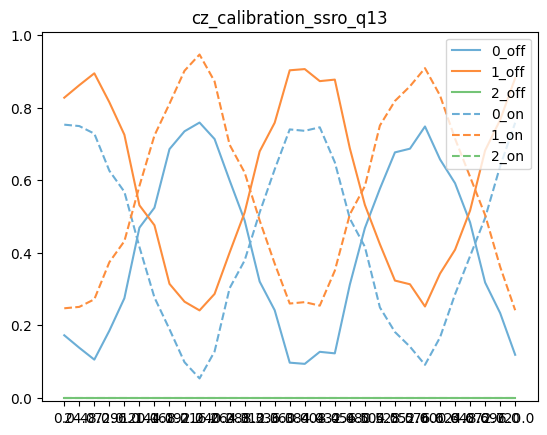

In [ ]:
%matplotlib inline

import numpy as np
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv

def mitigate(v,cm_inv):
    u = np.dot(v,cm_inv)
    # print(u,np.sum(u))
    def m(t):
        return norm(u-np.array(t))
    def con(t):
        return t[0]+t[1]+t[2]-1
    cons = ({'type': 'eq', 'fun': con},
            {'type': 'ineq', 'fun': lambda t: t[0]},
            {'type': 'ineq', 'fun': lambda t: t[1]},
            {'type': 'ineq', 'fun': lambda t: t[2]})
    result = minimize(m, v, method='SLSQP', constraints=cons)
    w = np.abs(np.round(result.x,10))
    # print(w)
    return w

dataset = ds
for qubit in ['q13']:
# for qubit in ['q13','q14']:
# qubit = 'q13'
    data_var = f'y{qubit}'

    for coord in dataset.coords:
        if f'control_ons{qubit}' in str(coord):
            sweep_coord = coord
        elif f'ramsey_phases{qubit}' in str(coord):
            state_coord = coord
        elif 'shot' in str(coord):
            shot_coord = coord

    independents = dataset[state_coord].values[:-3]
    calibs = dataset[state_coord].values[-3:]
    sweeps = dataset.coords[sweep_coord]
    shots = len(dataset[shot_coord].values)
    magnitudes = []
    for indx, _ in enumerate(sweeps):
        # indx = 0
        # print(f'{indx = }')
        # print(f'{ro_amplitude.values = }')
        y = np.repeat(calibs,shots)
        IQ_complex = np.array([])
        for state, _ in enumerate(calibs):
            IQ_complex_0 = dataset[data_var].isel({sweep_coord:indx,state_coord:-3+state})
            IQ_complex = np.append(IQ_complex,IQ_complex_0)
        # IQ = np.array([I,Q]).T
        IQ = IQ_complex.reshape(-1,2)
        lda = LinearDiscriminantAnalysis(solver = "svd", store_covariance=True)
        # breakpoint()
        # print(IQ)
        cla = lda.fit(IQ,y)
        y_pred = cla.predict(IQ)

        cm = confusion_matrix(y,y_pred)
        cm_norm = confusion_matrix(y,y_pred,normalize='true')
        cm_inv = inv(cm_norm)
        assignment = np.trace(cm_norm)/len(calibs)
        print(f'{assignment = }')

        # disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
        # disp.plot()
        # plt.show()

        raw_data = dataset[data_var].isel({sweep_coord:indx}).values
        raw_shape = raw_data.shape
        data_y_pred = cla.predict(raw_data.reshape(-1,2))
        data_y_pred = np.transpose(data_y_pred.reshape(raw_shape[:-1]))
        # print(data_y_pred.shape)
        # print(data_y_pred)
        data_res_shape = list(data_y_pred.shape[:-1])
        data_res_shape.append(len(calibs))

        data_res = np.array([])
        for index_2, sweep_2 in enumerate(data_y_pred):
            uniques, counts = np.unique(sweep_2, return_counts=True)
            raw_prob = counts/len(sweep_2)
            # print(raw_prob)
            mitigate_prob = mitigate(raw_prob,cm_inv)
            data_res = np.append(data_res,mitigate_prob)
            # print(mitigate_prob)
        data_res = data_res.reshape(data_res_shape)
        magnitudes.append(data_res)
    magnitudes = np.array(magnitudes)
    marker = ['-','--']
    legend = ['off','on']
    x = range(4)
    # colors = plt.get_cmap('RdBu_r')(np.linspace(0.2, 0.8, len(x)))
    # colors = plt.get_cmap('RdYlGn')(np.linspace(0.2, 0.8, 2))
    colors = plt.get_cmap('tab20c')
    for index,magnitude in enumerate(magnitudes):
        plt.plot(independents,magnitude[:-3,0],f'{marker[index]}',c=colors(1),label=f'0_{legend[index]}')
        plt.plot(independents,magnitude[:-3,1],f'{marker[index]}',c=colors(1+4),label=f'1_{legend[index]}')
        plt.plot(independents,magnitude[:-3,2],f'{marker[index]}',c=colors(1+4*2),label=f'2_{legend[index]}')
        plt.ylim(-0.01,1.01)
        plt.legend(loc = 'upper right')
        # plt.xlim(np.min(independents),np.max(independents))
    plt.title(f'cz_calibration_ssro_{qubit}')
    plt.savefig(f'{path}/{name}/cz_calibration_ssro_{qubit}.png')
    plt.show()

In [ ]:
np.diff(np.mean(magnitudes[:,:-3,2],axis = 1))

array([0.])

In [ ]:
colors = plt.get_cmap('RdYlGn')(np.linspace(0.2, 0.8, 2))
print(colors[1])

[0.4        0.74117647 0.38823529 1.        ]


In [ ]:
print(colors)

In [ ]:
magnitudes[:,:-3,0]

array([[0.95328687, 1.        , 0.97489076, 0.98119963, 0.95625897,
        0.97826324, 0.97291053, 0.99195332, 0.96982418, 1.        ,
        0.95966036, 0.95933393, 0.95112348, 0.99720885, 0.9554089 ,
        0.98439055, 0.93278169, 0.99826859, 1.        , 0.98239483,
        0.96128176, 0.93895345, 0.96381981, 0.98376218, 0.91227093,
        0.95988543, 0.95262008, 0.96938914, 0.97041375, 0.9554089 ,
        0.9835155 ],
       [0.57196983, 0.62658829, 0.55304507, 0.57090802, 0.56681152,
        0.57872153, 0.57781171, 0.55342449, 0.55171574, 0.56521868,
        0.57140295, 0.55482668, 0.53874458, 0.57462524, 0.63326385,
        0.51777045, 0.58888649, 0.56366518, 0.59009961, 0.56085663,
        0.57303289, 0.56764709, 0.57985954, 0.55793859, 0.61847084,
        0.53434505, 0.56776091, 0.55990903, 0.54272767, 0.61843364,
        0.58206046]])

In [ ]:
# %matplotlib inline
# qubit = 'q13'
# ds0 = ds[f'y{qubit}']
# ds0 = (ds0.values).reshape(1024*34*2,2)
# # print(ds0)
# plt.plot(ds0[:,0],ds0[:,1],'.r')
# plt.show()

# qubit = 'q14'
# ds0 = ds[f'y{qubit}']
# ds0 = (ds0.values).reshape(1024*34*2,2)
# # print(ds0)
# plt.plot(ds0[:,0],ds0[:,1],'.b')
# plt.show()

In [ ]:
# %matplotlib inline
# qubit = 'q13'

# ds0 = ds[f'y{qubit}'].sel(ramsey_phasesq13='c0',control_onsq13=False )
# ds1 = ds[f'y{qubit}'].sel(ramsey_phasesq13='c1',control_onsq13=False )
# ds2 = ds[f'y{qubit}'].sel(ramsey_phasesq13='c2',control_onsq13=False )

# plt.plot(ds0[:,0].values,ds0[:,1].values,'.r')
# plt.plot(ds1[:,0].values,ds1[:,1].values,'.b')
# plt.plot(ds2[:,0].values,ds2[:,1].values,'.g')
# plt.show()

# %matplotlib inline
# qubit = 'q14'

# ds0 = ds[f'y{qubit}'].sel(ramsey_phasesq14='c0',control_onsq14=False )
# ds1 = ds[f'y{qubit}'].sel(ramsey_phasesq14='c1',control_onsq14=False )
# ds2 = ds[f'y{qubit}'].sel(ramsey_phasesq14='c2',control_onsq14=False )

# plt.plot(ds0[:,0].values,ds0[:,1].values,'.r')
# plt.plot(ds1[:,0].values,ds1[:,1].values,'.b')
# plt.plot(ds2[:,0].values,ds2[:,1].values,'.g')
# plt.show()

In [ ]:
# nested join using join()
my_string = ",".join(str(element) for element in list(cm_inv.flatten()))
print(my_string)

In [ ]:
my_list = my_string.split(",")
size = int(len(my_list)**0.5)
my_list = np.array([float(i) for i in my_list]).reshape(size,size)

print(my_list)

[[ 1.36277471 -0.15911288 -0.20366183]
 [-0.29625934  1.42344841 -0.12718907]
 [-0.14756231 -0.02953404  1.17709634]]


## ro_amplitude_optimization_gef Data Broswing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
name = '20231225-165135-093-09e0cd-cz_calibration_ssro'
dp = f'data_directory/{name[:8]}/{name}/dataset.hdf5'

In [ ]:
ds = load_dataset(dp)
ds

<xarray.Dataset>
Dimensions:           (shot: 1024, ramsey_phasesq14: 34, control_onsq14: 2,
                       ReIm: 2, ramsey_phasesq13: 34, control_onsq13: 2)
Coordinates:
  * shot              (shot) int32 0 1 2 3 4 5 ... 1018 1019 1020 1021 1022 1023
  * ramsey_phasesq14  (ramsey_phasesq14) object '0.0' '24.0' '48.0' ... 'e' 'f'
  * ramsey_phasesq13  (ramsey_phasesq13) object '0.0' '24.0' '48.0' ... 'e' 'f'
  * control_onsq14    (control_onsq14) bool False True
  * control_onsq13    (control_onsq13) bool False True
Dimensions without coordinates: ReIm
Data variables:
    yq14              (shot, ramsey_phasesq14, control_onsq14, ReIm) float64 ...
    yq13              (shot, ramsey_phasesq13, control_onsq13, ReIm) float64 ...
Attributes:
    name:     cz_calibration_ssro
    tuid:     20231225-165135-093

0.091


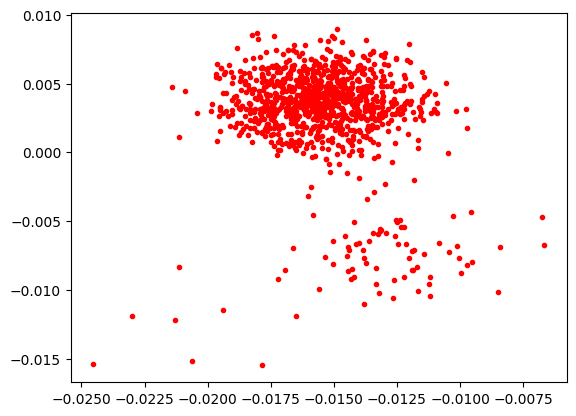

In [ ]:
%matplotlib inline
# select the data with ro_amplitudesq12 = 0.051
amp = ds.ro_amplitudesq12.values[5]
# for amp in ds.ro_amplitudesq12.values:
print(amp)
qubit = 'q130'
ds0 = ds[f'y{qubit}'].sel(ro_amplitudesq13=amp ,state = 0 )
ds1 = ds[f'y{qubit}'].sel(ro_amplitudesq13=amp ,state = 1 )
ds2 = ds[f'y{qubit}'].sel(ro_amplitudesq13=amp ,state = 2 )
# ds0 = (ds0.values).reshape(4096*3,2)
# ds1 = (ds1.values).reshape(4096*3,2)
# ds2 = (ds2.values).reshape(4096*3,2)

cut0 = 0
cut1 = 15
plt.plot(ds0[:,0].values,ds0[:,1].values,'.r')
# plt.plot(ds1[:,0].values,ds1[:,1].values,'.b')
# plt.plot(ds1[cut0::cut1,0].values,ds1[cut0::cut1,1].values,'*')
# plt.plot(ds2[:,0].values,ds2[:,1].values,'.g')
plt.show()

assignment = 0.8388671875


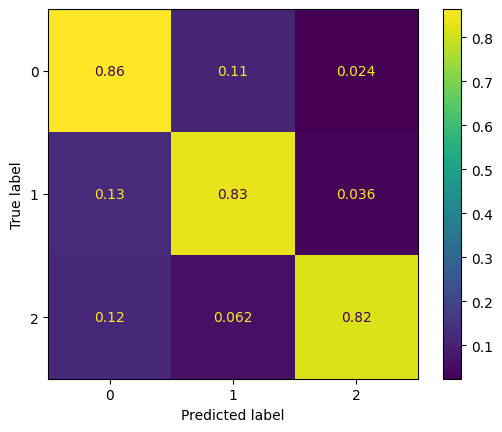

In [ ]:
import numpy as np
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dataset = ds
qubit = 'q12'
data_var = f'y{qubit}0'

for coord in dataset.coords:
    if f'amplitudes{qubit}' in str(coord):
        amplitude_coord = coord
    elif 'state' in str(coord):
        state_coord = coord
    elif 'shot' in str(coord):
        shot_coord = coord

independents = dataset[state_coord].values
amplitudes = dataset.coords[amplitude_coord]
shots = len(dataset[shot_coord].values)
fit_results = {}
# for indx, ro_amplitude in enumerate(amplitudes):
indx = 3
# print(f'{indx = }')
# print(f'{ro_amplitude.values = }')
y = np.repeat(independents,shots)
IQ_complex = np.array([])
for state in independents:
    IQ_complex_0 = dataset[data_var].isel({amplitude_coord:[indx],state_coord:state})
    IQ_complex = np.append(IQ_complex,IQ_complex_0)
# I = IQ_complex.real.flatten()
# Q = IQ_complex.imag.flatten()
# IQ = np.array([I,Q]).T
IQ = IQ_complex.reshape(-1,2)
lda = LinearDiscriminantAnalysis(solver = "svd", store_covariance=True)
# breakpoint()
# print(IQ)
y_pred = lda.fit(IQ,y).predict(IQ)

cm = confusion_matrix(y,y_pred)
cm_norm = confusion_matrix(y,y_pred,normalize='true')
# assignment = 1 - 1/2 * (err_wr_0 + err_wr_1)
assignment = np.trace(cm_norm)/len(independents)
print(f'{assignment = }')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
disp.plot()
plt.show()

In [ ]:
from numpy.linalg import inv
print(cm_norm)
cm_inv = inv(cm_norm)
print(cm_inv)
print(np.dot(cm_inv,cm_norm))

[[0.86425781 0.11132812 0.02441406]
 [0.12890625 0.83496094 0.03613281]
 [0.12011719 0.0625     0.81738281]]
[[ 1.18425448 -0.1557683  -0.02848618]
 [-0.17588313  1.22477137 -0.04888825]
 [-0.16058158 -0.0707597   1.23134128]]
[[ 1.00000000e+00 -4.40186082e-17 -8.83285957e-18]
 [ 3.78725371e-17  1.00000000e+00  8.53131584e-18]
 [ 2.47198095e-17  0.00000000e+00  1.00000000e+00]]


In [ ]:
v = [0.87,0.11,1-0.87-0.11]
print(v)

[0.87, 0.11, 0.020000000000000004]


In [ ]:
def mitigated(v,a0,a1):
    return np.dot(cm_inv,v)-[a0,a1,1-a0-a1]
res = minimize(mitigated, v)


TypeError: mitigated() missing 2 required positional arguments: 'a0' and 'a1'

In [ ]:
a,b = 0.8,0.1
v = [a,b,1-a-b]
u = np.dot(cm_inv,v)
print(v,u,np.sum(u))

[0.8, 0.05, 0.14999999999999997] [ 0.93534224 -0.08680117  0.05269794] 0.9012390169552309


In [ ]:
# Define the function to be minimized
from scipy.linalg import norm
def m(t):
    return norm(u-np.array(t))

In [ ]:
# Define the constraints
def con(t):
   return t[0]+t[1]+t[2]-1
# Define the constraints in the form required by the minimize function
cons = ({'type': 'eq', 'fun': con},
        {'type': 'ineq', 'fun': lambda t: t[0]},
        {'type': 'ineq', 'fun': lambda t: t[1]},
        {'type': 'ineq', 'fun': lambda t: t[2]})

In [ ]:
from scipy.optimize import minimize
result = minimize(m, v, method='SLSQP', constraints=cons)
print(np.abs(np.round(result.x,10)))

[0.94132282 0.         0.05867718]


In [ ]:
cm_inv

array([[ 1.18425448, -0.1557683 , -0.02848618],
       [-0.17588313,  1.22477137, -0.04888825],
       [-0.16058158, -0.0707597 ,  1.23134128]])

In [ ]:
# nested join using join()
my_string = ",".join(str(element) for element in list(cm_inv.flatten()))
print(my_string)

1.1842544812150915,-0.15576829843331808,-0.028486182781773627,-0.1758831264569345,1.2247713733537886,-0.04888824689685401,-0.1605815783706242,-0.07075969795381643,1.2313412763244407


In [ ]:
my_list = my_string.split(",")
size = int(len(my_list)**0.5)
my_list = np.array([float(i) for i in my_list]).reshape(size,size)

print(my_list)

[[ 1.18425448 -0.1557683  -0.02848618]
 [-0.17588313  1.22477137 -0.04888825]
 [-0.16058158 -0.0707597   1.23134128]]


## Redis Parameters

In [63]:
import redis
redis_connection = redis.Redis(decode_responses=True)
node = 'cz_chevron'
qubits = ['q21','q22','q21_q22']
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"cs:{qubit}")
    # Print the redis config line by line
    print(redis_config['cz_chevron'])
    # for key, value in redis_config.items():
    #     print(f"{key}: {value}")

Qubit parameters q21:
not_calibrated
Qubit parameters q22:
not_calibrated
Qubit parameters q21_q22:
not_calibrated


In [65]:
import redis
redis_connection = redis.Redis(decode_responses=True)
# qubits = ['q13','q14']
qubits = ['q21_q22']
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"couplers:{qubit}")
    # Print the redis config line by line
    for key, value in redis_config.items():
        print(f"{key}: {value}")
    # print(redis_config['cz_pulse_frequency'])
    # print(redis_config['cz_pulse_duration'])
    # print(redis_config['cz_pulse_amplitude'])
    # print(redis_config['cz_phase'])
    # print(redis_config['cz_pop_loss'])
    # print(redis_config['cz_leakage'])

Qubit parameters q21_q22:
ro_acq_delay: nan
ro_freq: nan
ro_freq_1: nan
ro_freq_2: nan
ro_freq_opt: nan
ro_ampl_opt: nan
freq_01: nan
freq_12: nan
anharmonicity: nan
mw_amp180: nan
mw_motzoi: nan
mw_ef_amp180: nan
fidelity: nan
discriminator: nan
t1_time: nan
selectivity: nan
ro_ampl: nan
parking_current: nan
cz_pulse_frequency: nan
cz_pulse_amplitude: nan
cz_pulse_duration: nan
cz_pulse_width: nan
dc_flux: nan
dc_flux_offset: nan
dc_flux_0: nan
cz_phase: nan
resonator_flux_quantum: nan
ro_pulse_delay: nan
ro_pulse_duration: nan
ro_acq_integration_time: nan
mw_pulse_duration: nan
init_duration: nan
min_calibration_point: nan
max_calibration_point: nan
spec_pulse_duration: nan
spec_amp: nan
att: nan
cz_pop_loss: nan
cz_leakage: nan
coupler_dynamic_phase: nan
inv_cm_opt: nan


In [67]:
import redis
redis_connection = redis.Redis(decode_responses=True)
qubits = [ 'q21','q22']
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"transmons:{qubit}")
    # Print the redis config line by line
    # for key, value in redis_config.items():
        # print(f"{key}: {value}")
    print(redis_config['cz_pulse_frequency'])
    print(redis_config['cz_pulse_duration'])
    print(redis_config['cz_pulse_amplitude'])
    # print(redis_config['cz_phase'])
    # print(redis_config['cz_pop_loss'])
    # print(redis_config['cz_leakage'])

Qubit parameters q21:
nan
nan
nan
Qubit parameters q22:
nan
nan
nan


In [ ]:
import redis
redis_connection = redis.Redis(decode_responses=True)
qubits = [ 'q12','q13','q14','q15']
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"transmons:{qubit}")
    # Print the redis config line by line
    print(redis_config['freq_01'])
    print(redis_config['freq_12'])
    # for key, value in redis_config.items():
    #     print(f"{key}: {value}")

Qubit parameters q12:
3366985350.8172603
3173745577.505435
Qubit parameters q13:
3583392807.127604
3344617330.110173
Qubit parameters q14:
3333262125.7570114
3133075732.4790416
Qubit parameters q15:
3872762251.21086
3631663526.956842


## Save VNA values

In [340]:
import redis
redis_connection = redis.Redis(decode_responses=True)
# qubits = [ 'q12','q13','q14','q15']
qubits = ['q16','q17','q18','q19','q20','q21','q22','q23','q24','q25']
qubit_freq_01_list,qubit_freq_ro_list,qubit_freq_12_list = {},{},{}
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"transmons:{qubit}")
    # Print the redis config line by line
    # for key, value in redis_config.items():
    #     print(f"{key}: {value}")
    print(redis_config['ro_freq'])
    print(redis_config['freq_01'])
    print(redis_config['freq_12'])
    qubit_freq_ro_list[qubit] = redis_config['ro_freq']
    qubit_freq_01_list[qubit] = redis_config['freq_01']
    qubit_freq_12_list[qubit] = redis_config['freq_12']

Qubit parameters q16:
6489739796.816151
3189000000.0
2993400000.0
Qubit parameters q17:
7059399869.2122345
3932200000.0
3699800000.0
Qubit parameters q18:
6712742151.173621
3254000000.0
3057400000.0
Qubit parameters q19:
6818362148.027776
3914600000.0
3681600000.0
Qubit parameters q20:
6494839241.529742
3333200000.0
3132200000.0
Qubit parameters q21:
6752736342.162048
3772200000.0
3543000000.0
Qubit parameters q22:
6476748475.479722
3325800000.0
3130400000.0
Qubit parameters q23:
7051822087.369359
3910400000.0
3674200000.0
Qubit parameters q24:
6583576730.713829
3271000000.0
3072400000.0
Qubit parameters q25:
6852972354.877701
4008800000.0
3769200000.0


In [333]:
for qubit in qubits:
    d = float(qubit_freq_ro_list[qubit]) - (float(qubit_freq_01_list[qubit])+float(qubit_freq_12_list[qubit]))
    print(d/1e6)

307.3397968161507
-572.6001307877655
401.3421511736212
-777.8378519722243
29.43924152974224
-562.4636578379517
20.548475479722022
-532.777912630641
240.17673071382904
-925.0276451222992


In [338]:
qubits

['q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25']

In [341]:
from config_files.VNA_values import VNA_resonator_frequencies, VNA_qubit_frequencies, VNA_f12_frequencies
for qubit in qubits:
    VNA_resonator_frequencies[qubit] = float(qubit_freq_ro_list[qubit])
    VNA_qubit_frequencies[qubit] = float(qubit_freq_01_list[qubit])
    VNA_f12_frequencies[qubit] = float(qubit_freq_12_list[qubit])
# rewrite the VNA_values.py file
with open('config_files/VNA_values.py', 'w') as f:
    f.write(f"VNA_resonator_frequencies = {VNA_resonator_frequencies}\n")
    f.write(f"VNA_qubit_frequencies = {VNA_qubit_frequencies}\n")
    f.write(f"VNA_f12_frequencies = {VNA_f12_frequencies}\n")

In [342]:
import numpy as np
print(VNA_resonator_frequencies)
print(VNA_qubit_frequencies)
print(VNA_f12_frequencies)
anahar = (np.array(list(VNA_f12_frequencies.values()))-np.array(list(VNA_qubit_frequencies.values()))) / 1e6
print(anahar)

{'q16': 6489739796.816151, 'q17': 7059399869.2122345, 'q18': 6712742151.173621, 'q19': 6818362148.027776, 'q20': 6494839241.529742, 'q21': 6752736342.162048, 'q22': 6476748475.479722, 'q23': 7051822087.369359, 'q24': 6583576730.713829, 'q25': 6852972354.877701, 'q11': 6934503303.198933}
{'q16': 3189000000.0, 'q17': 3932200000.0, 'q18': 3254000000.0, 'q19': 3914600000.0, 'q20': 3333200000.0, 'q21': 3772200000.0, 'q22': 3325800000.0, 'q23': 3910400000.0, 'q24': 3271000000.0, 'q25': 4008800000.0}
{'q16': 2993400000.0, 'q17': 3699800000.0, 'q18': 3057400000.0, 'q19': 3681600000.0, 'q20': 3132200000.0, 'q21': 3543000000.0, 'q22': 3130400000.0, 'q23': 3674200000.0, 'q24': 3072400000.0, 'q25': 3769200000.0}
[-195.6 -232.4 -196.6 -233.  -201.  -229.2 -195.4 -236.2 -198.6 -239.6]


In [ ]:
# VNA_resonator_frequencies = {'q11': 6934572785.610347, 'q12': 6606753684.764918, 'q13': 6688313321.558435, 'q14': 6331351280.923618, 'q15': 6933698139.447023, 'q16': 6491000000.0, 'q17': 7059000000.0, 'q18': 6712000000.0, 'q19': 6818000000.0, 'q20': 6494000000.0, 'q21': 6751000000.0, 'q22': 6477000000.0, 'q23': 7052000000.0, 'q24': 6583000000.0, 'q25': 6853000000.0}
# VNA_qubit_frequencies = {'q11': 3714895945.38633, 'q12': 3366961177.836733, 'q13': 3585016857.038436, 'q14': 3334060710.6204877, 'q15': 3872936707.280074, 'q16': 3189000000.0, 'q17': 3932000000.0, 'q18': 3254000000.0, 'q19': 3921000000.0, 'q20': 3333000000.0, 'q21': 3773000000.0, 'q22': 3326000000.0, 'q23': 3911000000.0, 'q24': 3271000000.0, 'q25': 4009000000.0}
# VNA_f12_frequencies = {'q11': 3480306890.6912713, 'q12': 3174059567.052809, 'q13': 3343386697.937837, 'q14': 3133224381.376709, 'q15': 3631763299.7146664, 'q16': 2993000000.0, 'q17': 3699000000.0, 'q18': 3154000000.0, 'q19': 3682000000.0, 'q20': 3233000000.0, 'q21': 3542000000.0, 'q22': 3131000000.0, 'q23': 3674000000.0, 'q24': 3171000000.0, 'q25': 3770000000.0}
